<a href="https://colab.research.google.com/github/AndreLovo/Analise-de-dados/blob/master/Brasileiro_2017_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Brasileiro 2017 </center>
C:\Users\André Lovo\OneDrive\Área de Trabalho\Brasileirao\Brasil_1721 <br>

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.options.plotting.backend = "plotly"
from matplotlib.ticker import FuncFormatter

# Informar ao matplotlib sobre os gráficos inline
%matplotlib inline    



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Brasil_1721/tabela17a.xlsx')

#Exibindo as 5 primeiras linhas do DataFrame
df.head(10)

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Unnamed: 0,semana,dia_semana,data,horario_jogo,time_casa,gols_casa,gols_visitante,time_visitante,publico_estadio,pts_casa,pts_visitante,time_vencedor,time_derrotado,estadio_jogo,arbitro
0,0,1,Sat,2017-05-13,16:00,Flamengo,1,1,Atlético Mineiro,50220,1,1,empate,empate,Estadio Jornalista Mário Filho,Jailson Macêdo Freitas
1,1,1,Sat,2017-05-13,19:00,Corinthians,1,1,Chapecoense,31470,1,1,empate,empate,Arena Corinthians,Elmo Alves Resende Cunha
2,2,1,Sun,2017-05-14,11:00,Fluminense,3,2,Santos,11835,3,0,Fluminense,Santos,Estadio Jornalista Mário Filho,Wagner Reway
3,3,1,Sun,2017-05-14,16:00,Bahia,6,2,Atl Paranaense,8127,3,0,Bahia,Atl Paranaense,Itaipava Arena Fonte Nova,Flavio Rodrigues De Souza
4,4,1,Sun,2017-05-14,16:00,Cruzeiro,1,0,São Paulo,11416,3,0,Cruzeiro,São Paulo,Estádio Governador Magalhães Pinto,Marcelo de Lima Henrique
5,5,1,Sun,2017-05-14,16:00,Ponte Preta,4,0,Sport Recife,3104,3,0,Ponte Preta,Sport Recife,Estádio Moisés Lucarelli,Marcos Mateus Pereira
6,6,1,Sun,2017-05-14,16:00,Palmeiras,4,0,Vasco da Gama,3325,3,0,Palmeiras,Vasco da Gama,Allianz Parque,Rodolpho Toski Marques
7,7,1,Sun,2017-05-14,16:00,Avaí,0,0,Vitória,4666,1,1,empate,empate,Estádio Aderbal Ramos da Silva,Felipe Gomes da Silva
8,8,1,Sun,2017-05-14,19:00,Grêmio,2,0,Botafogo (RJ),18551,3,0,Grêmio,Botafogo (RJ),Arena do Grêmio,Braulio da Silva Machado
9,9,1,Mon,2017-05-15,20:00,Coritiba,4,1,Atl Goianiense,10631,3,0,Coritiba,Atl Goianiense,Estádio Major Antônio Couto Pereira,Luis César De Oliveira Magalhães


In [4]:
del df['Unnamed: 0']

In [5]:
#Exibindo as 5 primeiras linhas do DataFrame
df.head(10)

,semana,dia_semana,data,horario_jogo,time_casa,gols_casa,gols_visitante,time_visitante,publico_estadio,pts_casa,pts_visitante,time_vencedor,time_derrotado,estadio_jogo,arbitro
0,1,Sat,2017-05-13,16:00,Flamengo,1,1,Atlético Mineiro,50220,1,1,empate,empate,Estadio Jornalista Mário Filho,Jailson Macêdo Freitas
1,1,Sat,2017-05-13,19:00,Corinthians,1,1,Chapecoense,31470,1,1,empate,empate,Arena Corinthians,Elmo Alves Resende Cunha
2,1,Sun,2017-05-14,11:00,Fluminense,3,2,Santos,11835,3,0,Fluminense,Santos,Estadio Jornalista Mário Filho,Wagner Reway
3,1,Sun,2017-05-14,16:00,Bahia,6,2,Atl Paranaense,8127,3,0,Bahia,Atl Paranaense,Itaipava Arena Fonte Nova,Flavio Rodrigues De Souza
4,1,Sun,2017-05-14,16:00,Cruzeiro,1,0,São Paulo,11416,3,0,Cruzeiro,São Paulo,Estádio Governador Magalhães Pinto,Marcelo de Lima Henrique
5,1,Sun,2017-05-14,16:00,Ponte Preta,4,0,Sport Recife,3104,3,0,Ponte Preta,Sport Recife,Estádio Moisés Lucarelli,Marcos Mateus Pereira
6,1,Sun,2017-05-14,16:00,Palmeiras,4,0,Vasco da Gama,3325,3,0,Palmeiras,Vasco da Gama,Allianz Parque,Rodolpho Toski Marques
7,1,Sun,2017-05-14,16:00,Avaí,0,0,Vitória,4666,1,1,empate,empate,Estádio Aderbal Ramos da Silva,Felipe Gomes da Silva
8,1,Sun,2017-05-14,19:00,Grêmio,2,0,Botafogo (RJ),18551,3,0,Grêmio,Botafogo (RJ),Arena do Grêmio,Braulio da Silva Machado
9,1,Mon,2017-05-15,20:00,Coritiba,4,1,Atl Goianiense,10631,3,0,Coritiba,Atl Goianiense,Estádio Major Antônio Couto Pereira,Luis César De Oliveira Magalhães


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   semana           380 non-null    int64         
 1   dia_semana       380 non-null    object        
 2   data             380 non-null    datetime64[ns]
 3   horario_jogo     380 non-null    object        
 4   time_casa        380 non-null    object        
 5   gols_casa        380 non-null    int64         
 6   gols_visitante   380 non-null    int64         
 7   time_visitante   380 non-null    object        
 8   publico_estadio  380 non-null    int64         
 9   pts_casa         380 non-null    int64         
 10  pts_visitante    380 non-null    int64         
 11  time_vencedor    380 non-null    object        
 12  time_derrotado   380 non-null    object        
 13  estadio_jogo     380 non-null    object        
 14  arbitro          380 non-null    object   

# Isolando equipes para os cálculos de pontos acumulados

In [7]:
# Montado a tabela do time no campeonato
VG=df.query('time_casa=="Vasco da Gama" | time_visitante=="Vasco da Gama"')
VG

,semana,dia_semana,data,horario_jogo,time_casa,gols_casa,gols_visitante,time_visitante,publico_estadio,pts_casa,pts_visitante,time_vencedor,time_derrotado,estadio_jogo,arbitro
6,1,Sun,2017-05-14,16:00,Palmeiras,4,0,Vasco da Gama,3325,3,0,Palmeiras,Vasco da Gama,Allianz Parque,Rodolpho Toski Marques
13,2,Sun,2017-05-21,11:00,Vasco da Gama,2,1,Bahia,19030,3,0,Vasco da Gama,Bahia,Estádio Club de Regatas Vasco da Gama,Leandro Bizzio Marinho
20,3,Sat,2017-05-27,16:00,Vasco da Gama,3,2,Fluminense,20442,3,0,Vasco da Gama,Fluminense,Estádio Club de Regatas Vasco da Gama,Raphael Claus
36,4,Sun,2017-06-04,16:00,Grêmio,2,0,Vasco da Gama,22578,3,0,Grêmio,Vasco da Gama,Arena do Grêmio,Sandro Ricci
45,5,Wed,2017-06-07,21:45,Vasco da Gama,2,5,Corinthians,16288,0,3,Corinthians,Vasco da Gama,Estádio Club de Regatas Vasco da Gama,Wagner Reway
51,6,Sat,2017-06-10,19:00,Vasco da Gama,2,1,Sport Recife,10273,3,0,Vasco da Gama,Sport Recife,Estádio Club de Regatas Vasco da Gama,Caio Max Augusto Vieira
66,7,Wed,2017-06-14,21:45,Chapecoense,2,1,Vasco da Gama,10003,3,0,Chapecoense,Vasco da Gama,Arena Condá,Jailson Macêdo Freitas
71,8,Sat,2017-06-17,19:00,Vasco da Gama,1,0,Avaí,10993,3,0,Vasco da Gama,Avaí,Estádio Club de Regatas Vasco da Gama,Rafael Traci
81,9,Wed,2017-06-21,21:00,Botafogo (RJ),3,1,Vasco da Gama,15048,3,0,Botafogo (RJ),Vasco da Gama,Estádio Nilton Santos,Leandro Pedro Vuaden
91,10,Sun,2017-06-25,11:00,Vasco da Gama,1,0,Atl Goianiense,20658,3,0,Vasco da Gama,Atl Goianiense,Estádio Club de Regatas Vasco da Gama,Dyorgines José Padovani Andrade


In [35]:
# vencedor_VG=list(VG['time_vencedor'])
# vencedor_VG

In [36]:
# pts_VG_acum=[]

# for i in range(len(vencedor_VG)):
#  if(vencedor_VG[i]=='Vasco da Gama'):
#    pts_VG_acum.append(3)
#  elif(vencedor_VG[i]=='empate'):
#    pts_VG_acum.append(1)
#  else:
#    pts_VG_acum.append(0)  

In [19]:
# pts_VG_acum

In [18]:
#Pontos acumulados:
# df_pts_VG_acum = pd.DataFrame(list(zip(pts_VG_acum)), columns = ['pts_VG'])
# df_pts_VG_acum

In [17]:
# df_pts_VG_acum['soma_acumulada']=df_pts_VG_acum['pts_VG'].cumsum()
# df_pts_VG_acum['soma_acumulada']

In [16]:
# list(df_pts_VG_acum['soma_acumulada'])

In [15]:
# df_pts_Flu_acum['soma_acumulada'].plot (kind='line')

In [20]:
rodada =          [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38];

SaoPaulo =        [0,3,6,6,9,9,10,10,10,11,11,11,12,12,15,16,19,19,19,22,23,23,24,27,28,31,31,34,34,37,40,43,44,45,45,46,49,50];
Chapecoense =     [1,4,7,10,10,10,13,13,13,13,14,15,15,18,18,21,21,22,22,25,25,25,25,28,31,32,32,32,35,38,39,40,41,44,47,48,51,54];
Avai =            [1,1,1,1,1,2,2,2,2,2,3,3,3,4,5,5,5,5,6,6,7,7,7,8,9,9,9,9,10,10,11,11,11,11,12,12,12,13];
Atlético_Mineiro =[1,1,2,3,6,6,6,9,10,13,16,17,17,20,20,20,23,23,23,26,26,29,30,31,31,34,37,38,38,41,42,42,45,46,47,50,51,54];
Atl_Goianiense =  [0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,3,3,3,6,6,6,6,7,7,7,7,8,8,8,8,9,9,9,9,9,10,11,12];
Vasco_da_Gama =   [0,3,6,6,6,9,9,12,12,15,16,16,19,20,20,23,23,23,24,25,25,28,31,31,32,33,36,39,42,43,44,45,48,49,50,50,53,56];
Fluminense =      [3,6,6,9,10,10,10,11,14,15,16,17,17,20,21,21,22,25,26,27,30,30,31,31,31,31,32,35,38,38,39,42,43,43,43,46,46,47];
Coritiba =        [3,3,6,9,12,13,14,15,15,15,16,16,19,19,19,19,19,22,25,25,26,26,27,27,27,28,28,28,31,32,35,38,39,40,43,43,43,43];
Palmeiras=        [3,3,3,4,4,7,7,10,13,16,19,19,19,22,23,26,29,32,32,33,33,36,37,40,43,43,44,47,50,53,54,54,54,57,60,60,63,63];
Atl_Paranaense=   [0,0,1,1,2,2,2,2,2,2,2,3,3,4,5,5,5,5,5,5,6,6,7,7,7,7,8,8,8,8,9,9,9,9,9,9,9,9];
Bahia=            [3,3,3,6,9,9,10,10,10,10,11,12,15,16,19,19,19,20,23,23,26,26,27,27,30,31,32,35,35,38,39,42,45,46,49,49,49,50];
Corinthians=      [1,4,7,10,13,16,19,20,23,26,29,32,35,36,37,40,41,44,47,47,50,50,50,53,54,55,58,58,59,59,59,62,65,68,71,71,72,72];
Santos=           [0,3,3,3,6,9,12,13,16,16,17,20,23,24,27,30,31,34,35,36,37,38,41,41,44,47,48,49,50,53,53,56,56,56,56,59,62,63];
PontePreta=       [3,3,4,7,7,10,10,11,14,14,15,15,15,15,18,21,21,22,23,24,27,27,28,28,28,31,31,32,32,32,35,35,35,36,39,39,39,39];
Sport =           [0,1,4,4,7,7,8,8,9,12,15,18,21,21,24,24,27,28,28,29,29,29,29,29,30,30,33,34,35,35,35,36,36,36,36,39,42,45];
Cruzeiro =        [0,1,1,1,1,1,1,2,2,2,2,2,2,3,4,4,5,5,6,6,6,7,7,7,7,8,8,8,8,8,9,9,9,9,10,11,11,12];
Grêmio=           [0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,3,3,3,3,4,4,4,4,4,4,4,4,5,5,6,6,6,7,7,7,8,8];
Flamengo =        [1,4,5,6,6,7,10,11,14,17,20,23,23,24,25,28,29,29,29,29,32,35,35,38,39,39,40,43,46,46,47,47,50,50,50,53,53,56];
Botafogo =        [0,3,6,7,7,8,9,12,15,15,15,16,19,22,23,24,24,24,25,28,28,31,34,37,40,40,43,43,44,47,48,48,51,51,51,52,52,53];
Vitoria =         [1,1,1,1,1,1,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,6,6,6,7,8,8,9,9,10,10,10];





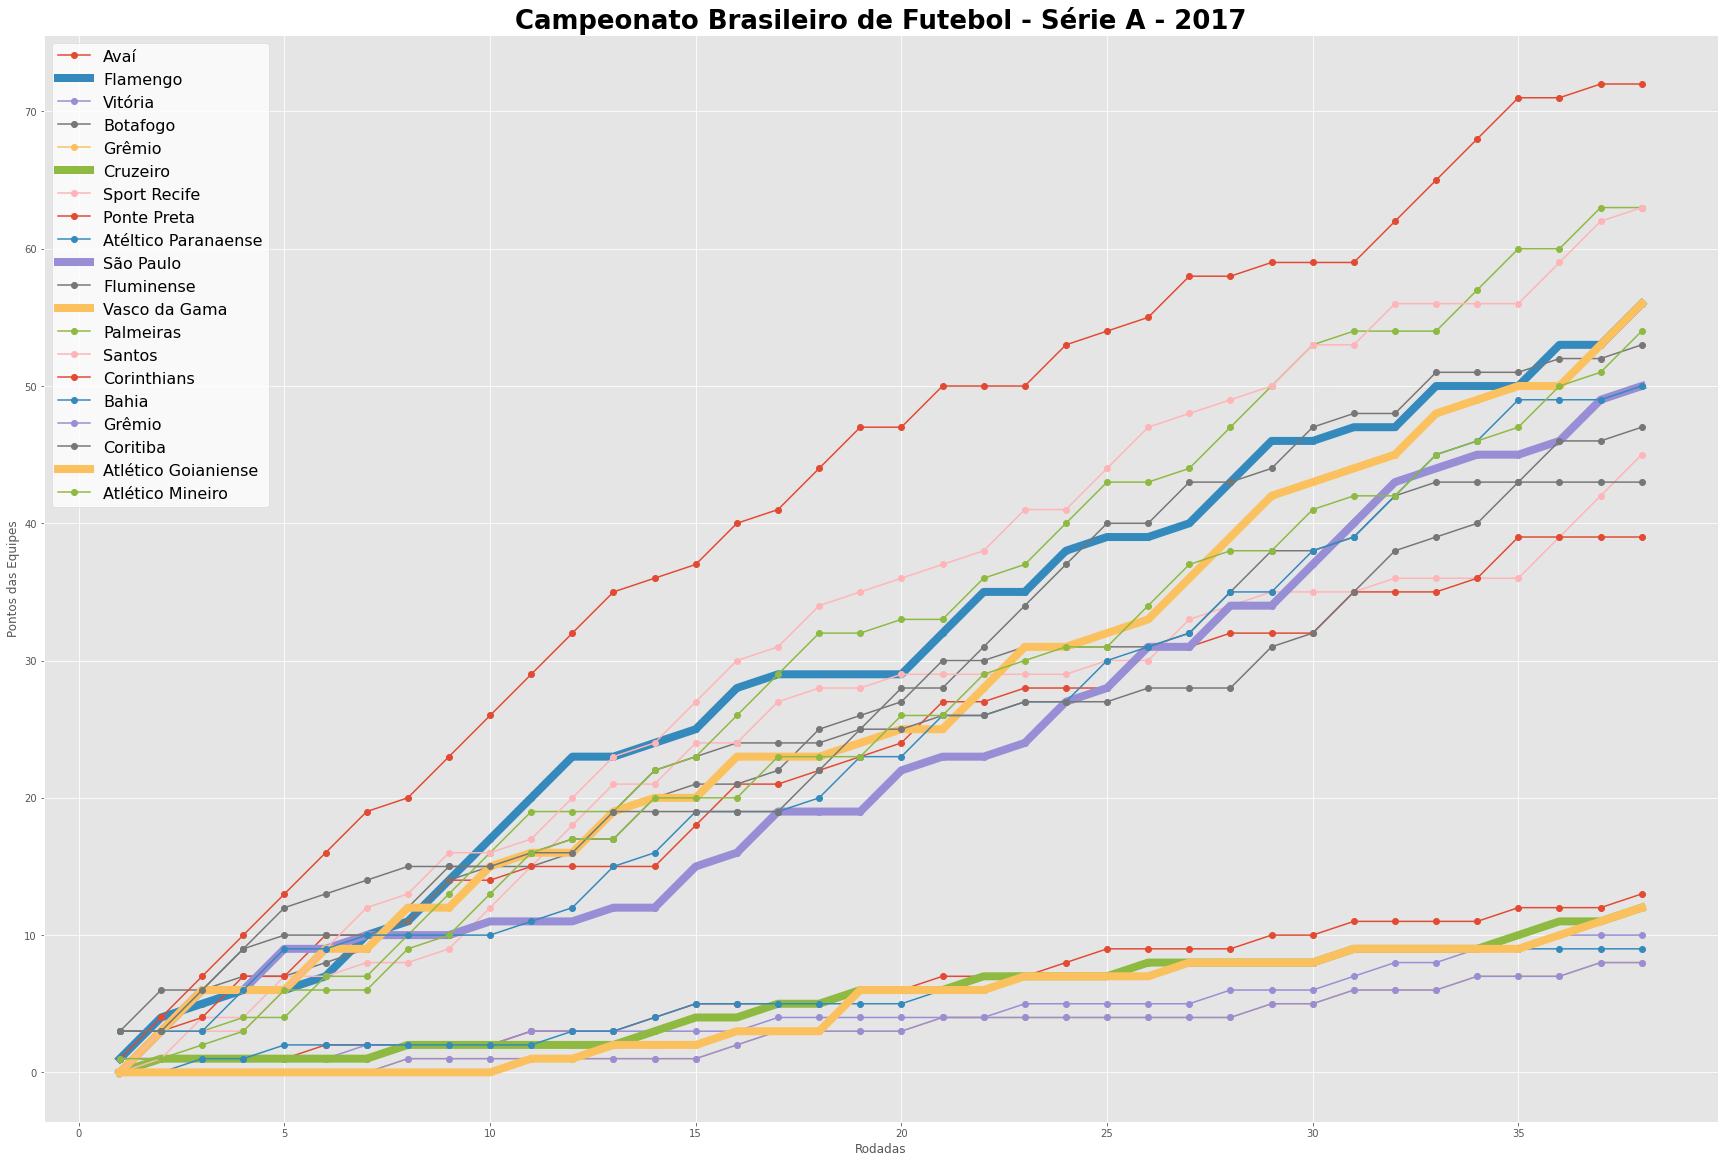

In [49]:
from pyparsing.core import White
# https://matplotlib.org/

plt.figure(figsize=(30,20))
plt.style.use('ggplot')


plt.plot(rodada, Avai, label='Avaí', marker="o")
plt.plot(rodada, Flamengo, label='Flamengo', marker="o", linewidth=8)
plt.plot(rodada, Vitoria, label='Vitória', marker="o")
plt.plot(rodada, Botafogo, label= 'Botafogo', marker="o")
plt.plot(rodada, Grêmio, label= 'Grêmio', marker="o")
plt.plot(rodada, Cruzeiro, label= 'Cruzeiro', marker="o", linewidth=8)
plt.plot(rodada, Sport, label= 'Sport Recife', marker="o")
plt.plot(rodada, PontePreta, label= 'Ponte Preta', marker="o")
plt.plot(rodada, Atl_Paranaense, label= 'Atéltico Paranaense', marker="o")
plt.plot(rodada, SaoPaulo, label= 'São Paulo', marker="o" ,linewidth=8)
plt.plot(rodada, Fluminense, label= 'Fluminense', marker="o")
plt.plot(rodada, Vasco_da_Gama, label= 'Vasco da Gama', marker="o", linewidth=8)
plt.plot(rodada, Palmeiras, label= 'Palmeiras',marker="o")
plt.plot(rodada, Santos, label= 'Santos',marker="o")
plt.plot(rodada, Corinthians, label= 'Corinthians',marker="o")
plt.plot(rodada, Bahia, label= 'Bahia',marker="o")
plt.plot(rodada, Grêmio, label= 'Grêmio',marker="o")
plt.plot(rodada, Coritiba, label= 'Coritiba',marker="o")
plt.plot(rodada, Atl_Goianiense, label= 'Atlético Goianiense',marker="o", linewidth=8)
plt.plot(rodada,Atlético_Mineiro, label= 'Atlético Mineiro',marker="o")
plt.title('Campeonato Brasileiro de Futebol - Série A - 2017', fontsize= 26, fontweight='bold')
plt.xlabel("Rodadas")
plt.ylabel("Pontos das Equipes")
plt.legend(fontsize=16, facecolor='White')
plt.show()
